# Dispersion relations

In [2]:
# Import things we'll need
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from scipy.fft import fft, fftshift, fftfreq
from IPython.display import HTML

%matplotlib inline

For a dielectric waveguide, the dispersion relation is too complicated to plot by hand with much accuracy.  So, we'll do it numerically.  The expression from the notes is:
$$
kd \sqrt{n_1^2 - R^2} - 2 \tan^{-1} \left(R^2 - n_0^2 \over n_1^2 - R^2 \right) = m \pi
$$
We can rearrange this to find $kd$ (i.e. the number of radians across the core of the waveguide, in vacuum):
$$
kd = {
    2 \tan^{-1} \left(R^2 - n_0^2 \over n_1^2 - R^2 \right) + m \pi 
    \over 
    \sqrt{n_1^2 - R^2}
}
$$
where $n_1$, $n_0$ are the refractive indices of the core and cladding respectively, and $R=\beta / k$ is the ratio of the propagation constant to the vacuum wavelength.

Text(0.5, 1.0, 'n1=1.5, n0=1.0')

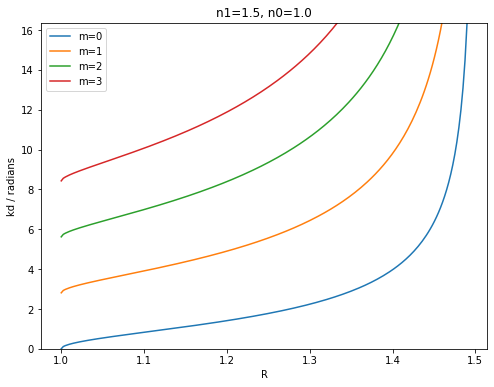

In [47]:
def kd(R, m, n1=1.5, n0=1):
    return (
        2*np.arctan(np.sqrt(
            (R**2 - n0**2)
            /(n1**2 - R**2)
        )) + m * np.pi
    ) / (
        np.sqrt(n1**2 - R**2)
    )

Rs = np.linspace(1, 1.49, 200)

f, ax = plt.subplots(1,1, figsize=(8, 6))
for m in range(4):
    ax.plot(Rs, kd(Rs, m), label=f"m={m}")
ax.legend()
ax.set_ylabel("kd / radians")
ax.set_xlabel("R")
ax.set_ylim(0, np.max(kd(Rs, 0)))
ax.set_title("n1=1.5, n0=1.0")

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c39ff7e588>)

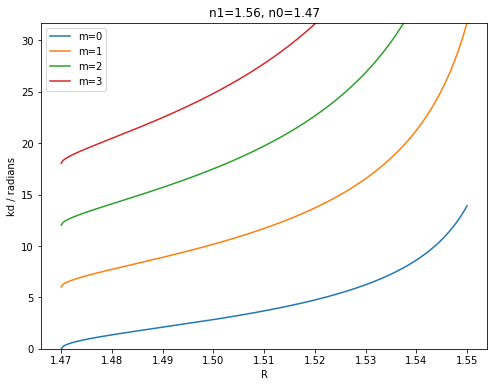

In [50]:
def kd(R, m, n1=1.5, n0=1):
    return (
        2*np.arctan(np.sqrt(
            (R**2 - n0**2)
            /(n1**2 - R**2)
        )) + m * np.pi
    ) / (
        np.sqrt(n1**2 - R**2)
    )

def plot_dispersion(
    n0 = 1.47,
    n1 = 1.7,
    modes = 10,
    limit_mode = 1,
):
    Rs = np.linspace(n0, n1-0.01, 200)

    f, ax = plt.subplots(1,1, figsize=(8, 6))
    for m in range(modes):
        ax.plot(Rs, kd(Rs, m, n1, n0), label=f"m={m}")
    ax.legend()
    ax.set_ylabel("kd / radians")
    ax.set_xlabel("R")
    ax.set_ylim(0, np.max(kd(Rs, limit_mode, n1, n0)))
    ax.set_title(f"n1={n1}, n0={n0}")
    return f, ax
plot_dispersion(1.47, 1.56, 4, 1)

If we want to plot $\omega$ against $\beta$ as is more conventionally done, we just need to remember that $\omega = k c = kd c/d$ (and $c$, $d$ are constants), and that $R=\beta c/\omega$ so $\beta = R \omega / c$.  Thus:

<IPython.core.display.Javascript object>


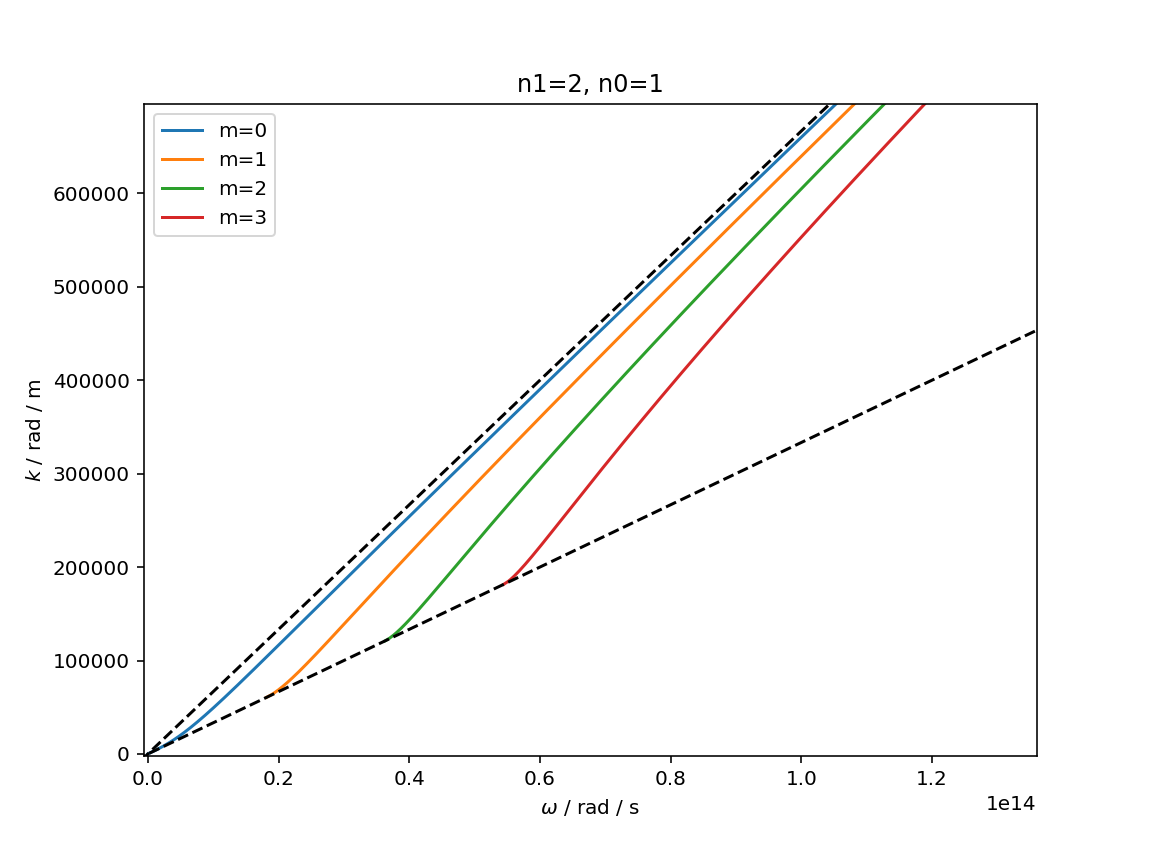

[ -50496.65777133 1060429.81319797]
[-100993.31554266 2120859.62639594]


Text(0.5, 1.0, 'n1=2, n0=1')

In [98]:
def abline(axes, slope, intercept):
    """Plot a line from slope and intercept"""
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    print(y_vals)
    plt.plot(x_vals, y_vals, '--', color="black")

n0 = 1
n1 = 2
d = 30e-6  # 100um core
c = 3e8     # speed of light, m/s
modes = 4
limit_mode = 1


Rs = np.linspace(n0, n1-0.01, 200)

f, ax = plt.subplots(1,1, figsize=(8, 6))
for m in range(modes):
    kds = kd(Rs, m, n1, n0)
    frequencies = kds * c / d
    propagation_constants = Rs * frequencies / c
    if m > limit_mode:
        ax.autoscale(False)
    ax.plot(frequencies, propagation_constants, label=f"m={m}")
abline(ax, n0/c, 0)
abline(ax, n1/c, 0)

ax.legend()
ax.set_ylabel("$k$ / rad / m")
ax.set_xlabel("$\\omega$ / rad / s")
ax.set_title(f"n1={n1}, n0={n0}")

In [96]:
%matplotlib notebook